# Question 4

Student Attendance Dashboard for Decision Making. You will be given a
Google Sheet with different sheets holding data of different classes. Create
a dashboard showing a summary of what's happening across different
classes. Which students need attention for missing sessions? Which
students are unsatisfied? Which students are very satisfied? <Date>
Column shows attendance. R-<Date> Column shows the rating by the
candidate. Extra marks for identifying more useful insights. Missing values
of the Type column can be treated as STUDENT. This data gets updated on
a daily basis. The latest data gets injected in early columns. Your code
shouldn't need any changes to deal with the latest data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"Batchwise Attendance Data - Class 1.csv",sep="," , encoding="Unicode_escape")
data

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,7,Missed,8,Missed,9,Missed,7,...,Missed,5,Missed,7,Missed,10,Missed,8,Missed,5
1,2,NaN,Missed,10,Missed,6,Missed,7,Attended,7,...,Attended,7,Attended,5,Missed,7,Attended,10,Missed,8
2,3,STUDENT,Missed,6,Missed,5,Missed,8,Missed,6,...,Attended,6,Missed,6,Missed,10,Attended,6,Attended,8
3,4,STUDENT,Missed,7,Missed,5,Attended,6,Missed,7,...,Missed,5,Attended,7,Attended,5,Attended,8,Attended,8
4,5,WORKING,Missed,8,Missed,6,Missed,10,Missed,5,...,Missed,9,Missed,5,Missed,9,Missed,7,Missed,10
5,6,NaN,Missed,6,Missed,8,Missed,7,Missed,7,...,Missed,9,Attended,7,Attended,6,Attended,10,Attended,9
6,7,STUDENT,Attended,8,Attended,10,Attended,7,Attended,5,...,Attended,9,Attended,8,Attended,10,Attended,5,Attended,9
7,8,STUDENT,Missed,9,Missed,9,Missed,10,Missed,6,...,Missed,9,Missed,5,Missed,10,Missed,9,Missed,6
8,9,IGNORE,Missed,8,Missed,7,Missed,5,Missed,9,...,Missed,9,Missed,5,Missed,7,Missed,8,Missed,7
9,10,NaN,Missed,10,Missed,9,Missed,5,Missed,5,...,Missed,6,Missed,6,Missed,9,Missed,8,Missed,7


# Data Cleaning and Preprocessing

In [3]:
data.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [4]:
(data.isnull().sum()*len(data))//100

Student Roll Num     0
Type                14
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             0
R-7-01-21            0
06-01-21             0
R-6-01-21            0
05-01-21             0
R-5-01-21            0
04-01-21             0
R-4-01-21            0
03-01-21             0
R-3-01-21            0
02-01-21             0
R-02-01-21           0
01-01-21             0
R-01-01-21           0
dtype: int64

In [5]:
date_columns = data.columns[2:]
data["Total_Missed_Sessions"] = data[date_columns].apply(lambda row: row.str.count("Missed").sum(), axis=1)
data["Total_Missed_Sessions"]

0     10.0
1      6.0
2      6.0
3      5.0
4     10.0
5      6.0
6      0.0
7     10.0
8     10.0
9     10.0
10     0.0
11     0.0
12     0.0
13     1.0
14     0.0
15     4.0
16     5.0
17    10.0
18     3.0
19     4.0
20    10.0
21     0.0
22    10.0
23     2.0
24     0.0
25     1.0
26     6.0
27     0.0
28     1.0
29     4.0
30     0.0
31    10.0
32    10.0
33     0.0
34    10.0
35    10.0
36     8.0
37     1.0
38    10.0
39     2.0
40     0.0
41     3.0
42    10.0
43     0.0
44     0.0
45     7.0
46     1.0
47     4.0
48    10.0
49    10.0
50    10.0
51    10.0
52     5.0
53     1.0
54     7.0
55     2.0
56     1.0
Name: Total_Missed_Sessions, dtype: float64

# # Calculation 

In [6]:
rating_columns = data.columns[3::2]  # Columns containing ratings
data["Average_Rating"] = data[rating_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)
threshold_unsatisfied = 5  # Set your threshold for unsatisfied students
threshold_very_satisfied = 8  # Set your threshold for very satisfied students
data["Satisfaction_Level"] = pd.cut(data["Average_Rating"],
                                    bins=[0, threshold_unsatisfied, threshold_very_satisfied, 10],
                                    labels=["Unsatisfied", "Neutral", "Very Satisfied"])

data["Satisfaction_Level"]

0            Neutral
1            Neutral
2            Neutral
3            Neutral
4            Neutral
5            Neutral
6            Neutral
7            Neutral
8            Neutral
9            Neutral
10           Neutral
11    Very Satisfied
12    Very Satisfied
13           Neutral
14           Neutral
15           Neutral
16           Neutral
17           Neutral
18           Neutral
19           Neutral
20           Neutral
21           Neutral
22           Neutral
23           Neutral
24           Neutral
25           Neutral
26           Neutral
27           Neutral
28           Neutral
29           Neutral
30           Neutral
31    Very Satisfied
32           Neutral
33           Neutral
34           Neutral
35           Neutral
36           Neutral
37           Neutral
38           Neutral
39           Neutral
40           Neutral
41           Neutral
42           Neutral
43           Neutral
44    Very Satisfied
45           Neutral
46           Neutral
47           

# Data Visualization

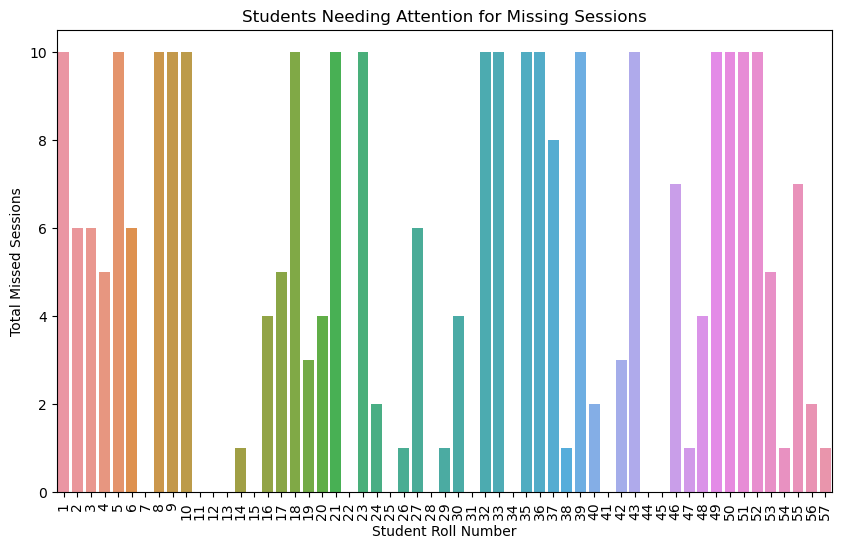

In [7]:
# Visualization 1: Students needing attention for missing sessions
plt.figure(figsize=(10, 6))
sns.barplot(x="Student Roll Num", y="Total_Missed_Sessions", data=data.sort_values(by="Total_Missed_Sessions", ascending=False))
plt.title("Students Needing Attention for Missing Sessions")
plt.xlabel("Student Roll Number")
plt.ylabel("Total Missed Sessions")
plt.xticks(rotation=90)
plt.show()

Conclusion: From the bar plot, we can observe which students have missed the most sessions like roll number 8,9,10,18......51,52,53, indicating those who might need attention to improve their attendance.

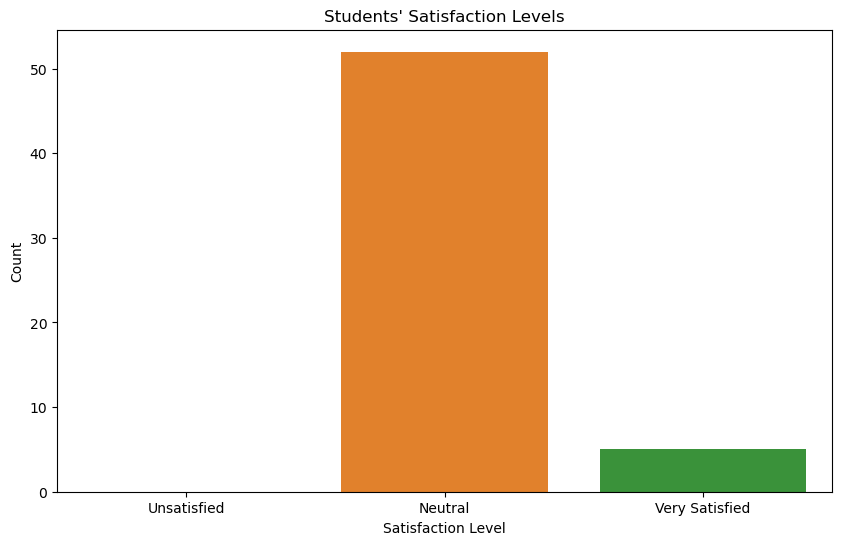

In [8]:
# Visualization 2: Students' satisfaction levels
plt.figure(figsize=(10, 6))
sns.countplot(x="Satisfaction_Level", data=data)
plt.title("Students' Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

Conclusion: From above graph we get how many student are Very satisfied

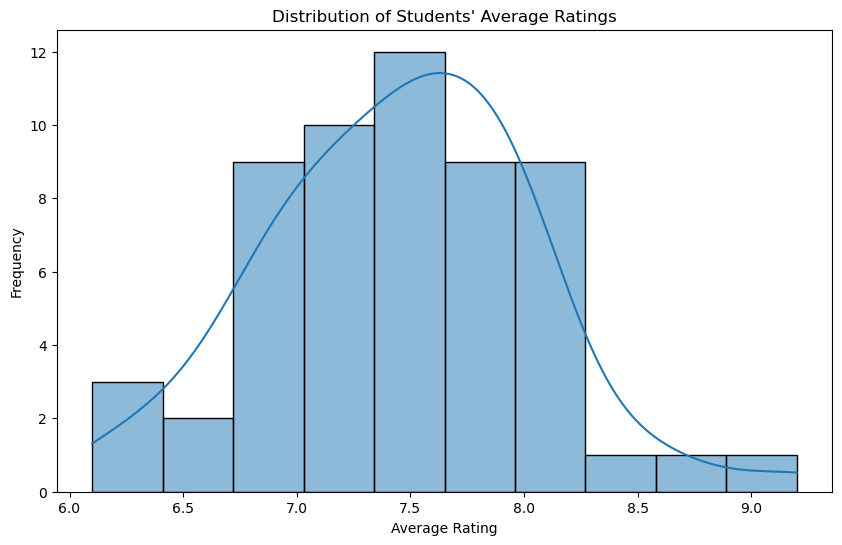

In [9]:
# Visualization 3: Students' ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Average_Rating", bins=10, kde=True)
plt.title("Distribution of Students' Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

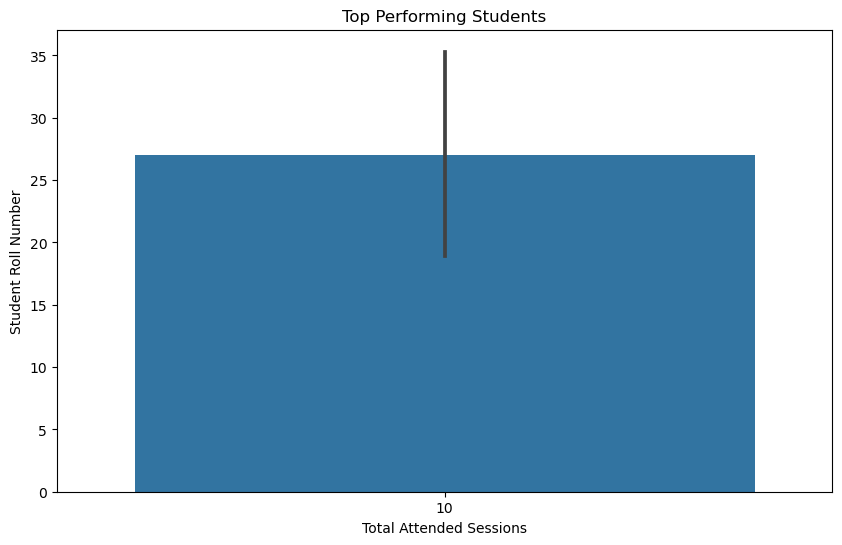

In [10]:
# Visualization 4:Calculate total attended sessions and average ratings
data['Total_Attended'] = data[date_columns].apply(lambda col: (col == 'Attended').sum(), axis=1)
top_students = data.nlargest(10, ['Total_Attended', 'Average_Rating'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Attended', y='Student Roll Num', data=top_students)
plt.xlabel('Total Attended Sessions')
plt.ylabel('Student Roll Number')
plt.title('Top Performing Students')
plt.show()


Conclusion: The bar plot highlights the students who have attended the most sessions and achieved high average ratings, indicating their strong performance.

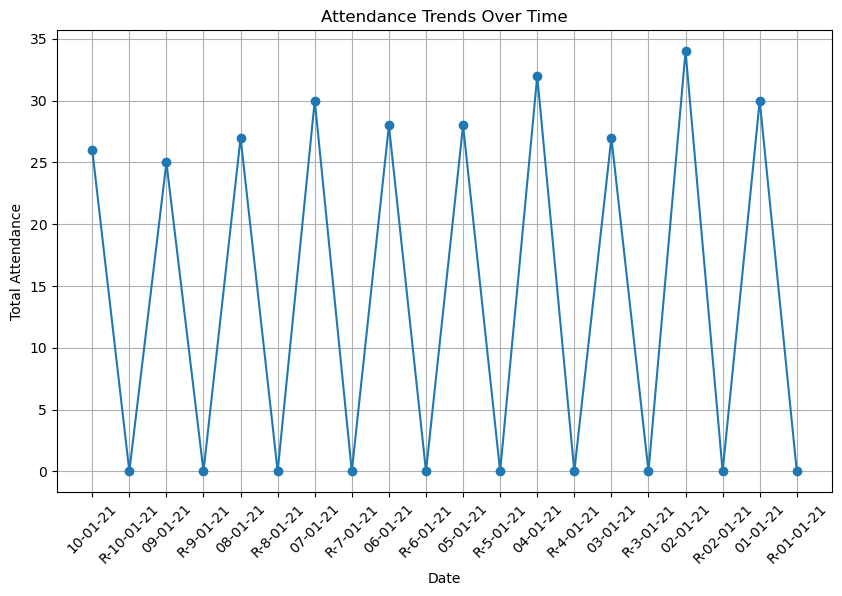

In [11]:
# Visualization 5:Calculate total attendance for each date
attendance_by_date = data[date_columns].apply(lambda col: (col == 'Attended').sum())

plt.figure(figsize=(10, 6))
plt.plot(attendance_by_date.index, attendance_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Attendance')
plt.title('Attendance Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Conclusion: The line chart provides insights into how attendance has fluctuated over time, helping to identify any patterns or trends

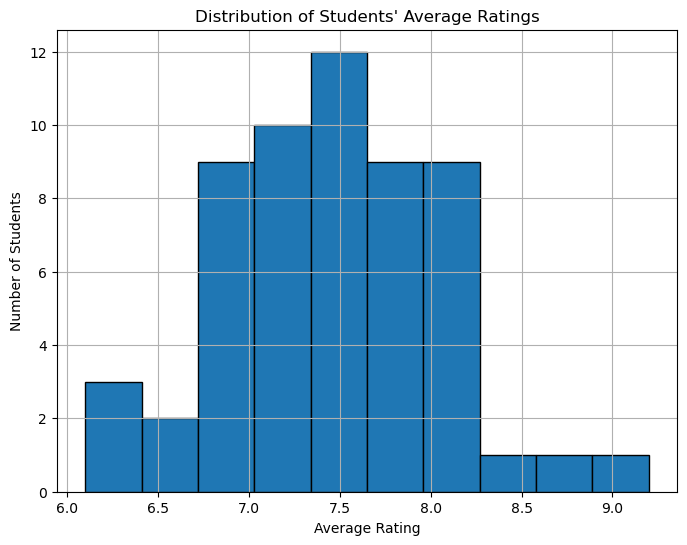

In [12]:
# Visualization 6: Create a histogram for students' average ratings
plt.figure(figsize=(8, 6))
plt.hist(data["Average_Rating"].dropna(), bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Students')
plt.title('Distribution of Students\' Average Ratings')
plt.grid(True)
plt.show()

Conclusion: The histogram offers an understanding of the distribution of students' average ratings, which can give insights into the overall performance of the students.

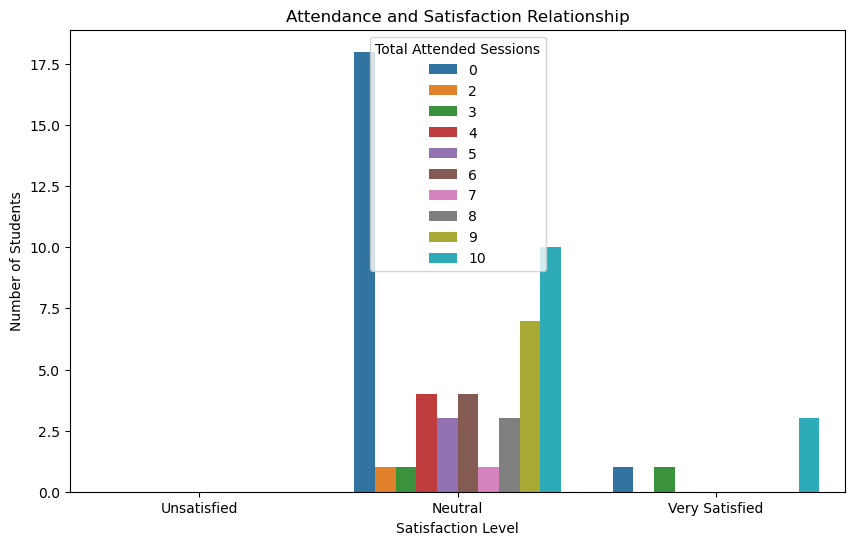

In [13]:
# Visualization 7: Create a grouped bar chart for attendance and satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction_Level', hue='Total_Attended', data=data)
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Students')
plt.title('Attendance and Satisfaction Relationship')
plt.legend(title='Total Attended Sessions')
plt.show()

Conclusion: The grouped bar chart helps identify the distribution of students' satisfaction levels based on their attendance, providing insights into how attendance might affect satisfaction.

In [14]:
#Visualization 8:
threshold_attendance = 0.6 
students_needing_attention = data[data['Total_Attended'] < threshold_attendance]

print("Students needing attention:")
print(students_needing_attention['Student Roll Num'].tolist())


Students needing attention:
[1, 5, 8, 9, 10, 18, 19, 21, 23, 32, 33, 35, 36, 39, 43, 49, 50, 51, 52]


Conclusion: By printing the roll numbers of students needing attention, we can take proactive measures to address their attendance issues.

